In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://docs.quantum-computing.ibm.com/run/primitives
# result = Sampler().run(circuits).result()

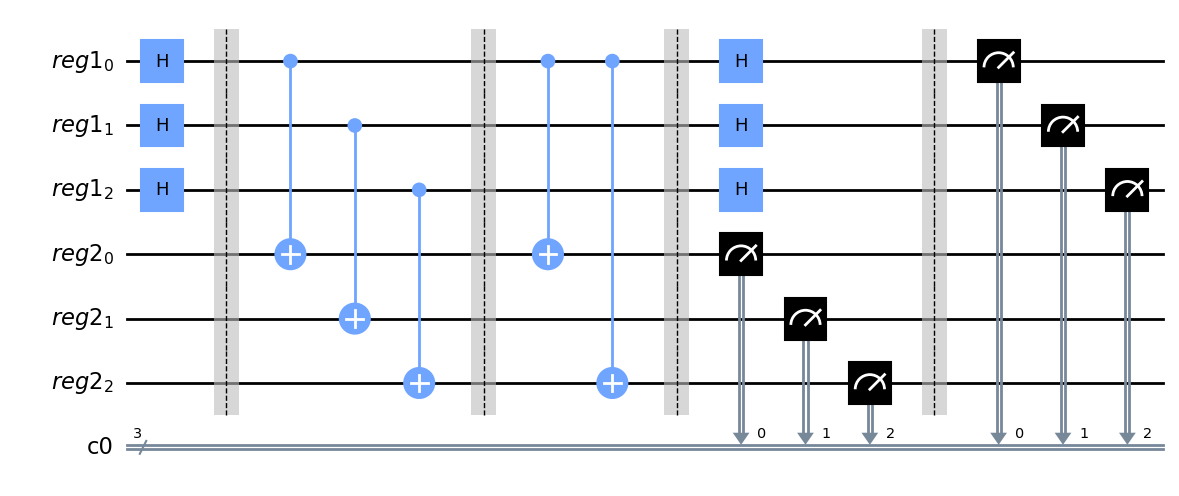

In [5]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, transpile, assemble

# considering our bit string to be ‘101’
b = '101'
n = len(b)

# creating two quantum registers of ’n’ qubits and 1 classical register of ’n’ qubits
q_reg1 = QuantumRegister(n, 'reg1')
q_reg2 = QuantumRegister(n, 'reg2')
c_reg = ClassicalRegister(n)
circuit = QuantumCircuit(q_reg1, q_reg2, c_reg)

# applying H-gate on qubits of the first register
circuit.h(q_reg1)
circuit.barrier()

# copying the data of the first register to the second register
circuit.cx(q_reg1, q_reg2)
circuit.barrier()

# applying bit-wise X-OR from register 1 to register 2 where qubits of the first register are 1
circuit.cx(q_reg1[0], q_reg2[0])
circuit.cx(q_reg1[0], q_reg2[2])
circuit.barrier()

# measuring qubits of the second register
circuit.measure(q_reg2, c_reg)

# applying H-gate to qubits of the first register
circuit.h(q_reg1)
circuit.barrier()

# measuring qubits of the first register
circuit.measure(q_reg1, c_reg)

circuit.draw()


/tmp/ipykernel_87/2293970437.py:4: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = qasm_sim.run(job).result()


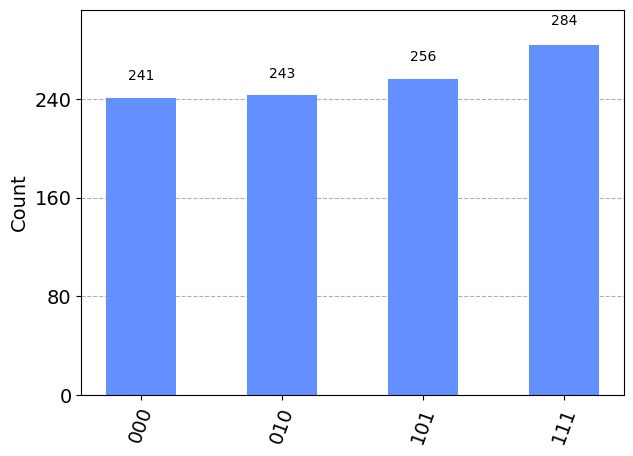

In [6]:
# running the circuit using "qasm simulator"
qasm_sim = Aer.get_backend("qasm_simulator")
job = assemble(circuit,qasm_sim)
result = qasm_sim.run(job).result()
counts = result.get_counts()
plot_histogram(counts)